In [1]:
import sys
sys.path.insert(0, '/home/ldoyle/packages')
import numpy as np
import pysindy as ps
import matplotlib.pyplot as plt
from glob import glob

In [2]:
direc = "/home/ldoyle/notebooks/ensembleSINDyArrays_30/"
file_list = glob(direc+"*")

In [3]:
len(file_list)

77

In [4]:
def printEnsemble(coeff_arr, features, include_std=False,cut_off = 1e-3, median= False):
    if median:
        coefs = np.median(coeff_arr, axis=0)
    else:
        coefs = np.mean(coeff_arr, axis=0)
    if include_std:
        stds = np.std(coeff_arr, axis = 0)
        std_str = "St. Dev.:  "
    above_cut_off = np.argwhere(np.abs(coefs)>cut_off).flatten()
#     features =  model.get_feature_names()
    equation_str= "(x0)' = "
    for count, val in enumerate(above_cut_off):
        if count >0:
            equation_str+=" + "
        equation_str+= "{0:.6f}".format(coefs[val])
        equation_str+= " "+features[val]
        if include_std:
            if count >0:
                std_str+=" , "
            std_str+=features[val]+": "
            std_str+= "{0:.6f}".format(stds[val])
        
    print(equation_str)
    if include_std:
        print(std_str)

In [5]:
feats = ['1',
 'x0',
 'x0x0',
 'x0_1',
 'x0_11',
 'x0_111',
 'x0_1111',
 'x0x0_1',
 'x0x0x0_1',
 'x0x0_11',
 'x0x0x0_11',
 'x0x0_111',
 'x0x0x0_111',
 'x0x0_1111',
 'x0x0x0_1111']

In [21]:
for val in file_list[:10]:
    h = np.load(val)[:,0,:]
    print("\n File Name "+val[len(direc)+1:])
    printEnsemble(h, feats,include_std=True, median=False)


 File Name 021-11-01T2321_normal_thresh_5.00E-02.npy
(x0)' = 0.671967 x0_1 + -0.007110 x0_11 + 0.312515 x0_111 + -0.002238 x0_1111 + 0.004104 x0x0x0_1 + 0.002548 x0x0x0_111
St. Dev.:  x0_1: 0.066324 , x0_11: 0.038286 , x0_111: 0.050279 , x0_1111: 0.012053 , x0x0x0_1: 0.022100 , x0x0x0_111: 0.013723

 File Name 021-11-01T2321_normal_thresh_5.00E-03.npy
(x0)' = 0.682609 x0_1 + -0.007720 x0_11 + 0.318511 x0_111 + -0.002797 x0_1111 + 0.007430 x0x0_1 + -0.001186 x0x0x0_1 + -0.002897 x0x0_11 + 0.001564 x0x0x0_11 + 0.004255 x0x0_111 + -0.001203 x0x0x0_111 + -0.001634 x0x0_1111
St. Dev.:  x0_1: 0.044894 , x0_11: 0.033094 , x0_111: 0.022543 , x0_1111: 0.010958 , x0x0_1: 0.030586 , x0x0x0_1: 0.021204 , x0x0_11: 0.035848 , x0x0x0_11: 0.018732 , x0x0_111: 0.017306 , x0x0x0_111: 0.011454 , x0x0_1111: 0.010919

 File Name 021-11-02T0511_normal_thresh_1.00E-01.npy
(x0)' = 0.667829 x0_1 + 0.318016 x0_111
St. Dev.:  x0_1: 0.049689 , x0_111: 0.038184

 File Name 021-11-02T0511_normal_thresh_5.00E-02.np

In [22]:
for val in file_list[10:20]:
    h = np.load(val)[:,0,:]
    print("\n File Name "+val[len(direc)+1:])
    printEnsemble(h, feats,include_std=True, median=False)


 File Name 021-11-01T2311_smoothed_rad_4_thresh_1.00E-03.npy
(x0)' = 0.995359 x0_1 + 0.085548 x0_111 + 0.001802 x0x0x0_1 + 0.069996 x0x0x0_111
St. Dev.:  x0_1: 0.000778 , x0_111: 0.008556 , x0x0x0_1: 0.000348 , x0x0x0_111: 0.006233

 File Name 021-11-01T2321_smoothed_rad_4_thresh_5.00E-02.npy
(x0)' = 0.997028 x0_1 + 0.099174 x0_111 + 0.058204 x0x0x0_111
St. Dev.:  x0_1: 0.000551 , x0_111: 0.008639 , x0x0x0_111: 0.016453

 File Name 021-11-01T2321_smoothed_rad_4_thresh_1.00E-02.npy
(x0)' = 0.997194 x0_1 + 0.097754 x0_111 + 0.063240 x0x0x0_111
St. Dev.:  x0_1: 0.000626 , x0_111: 0.006013 , x0x0x0_111: 0.006169

 File Name 021-11-01T2321_smoothed_rad_4_thresh_1.00E-03.npy
(x0)' = 0.995696 x0_1 + 0.097202 x0_111 + 0.001408 x0x0x0_1 + 0.001041 x0x0_11 + 0.065429 x0x0x0_111
St. Dev.:  x0_1: 0.000888 , x0_111: 0.007126 , x0x0x0_1: 0.000651 , x0x0_11: 0.004459 , x0x0x0_111: 0.007426

 File Name 021-11-02T0511_smoothed_rad_4_thresh_1.00E-01.npy
(x0)' = 0.996414 x0_1 + 0.046617 x0_111
St. Dev.:

In [23]:
for val in file_list[20:30]:
    h = np.load(val)[:,0,:]
    print("\n File Name "+val[len(direc)+1:])
    printEnsemble(h, feats,include_std=True, median=False)


 File Name 021-11-01T2311_smoothed_rad_10_thresh_3.00E-03.npy
(x0)' = 0.997627 x0_1
St. Dev.:  x0_1: 0.000138

 File Name 021-11-01T2311_smoothed_rad_10_thresh_1.00E-03.npy
(x0)' = 0.996104 x0_1 + 0.001599 x0x0x0_1
St. Dev.:  x0_1: 0.000421 , x0x0x0_1: 0.000317

 File Name 021-11-01T2311_smoothed_rad_10_thresh_1.00E-05.npy
(x0)' = 0.995908 x0_1 + -0.001098 x0_111 + 0.001695 x0x0x0_1
St. Dev.:  x0_1: 0.000428 , x0_111: 0.000103 , x0x0x0_1: 0.000261

 File Name 021-11-01T2321_smoothed_rad_10_thresh_3.00E-03.npy
(x0)' = 0.997724 x0_1
St. Dev.:  x0_1: 0.000205

 File Name 021-11-01T2321_smoothed_rad_10_thresh_1.00E-04.npy
(x0)' = 0.996532 x0_1 + -0.001379 x0_111 + 0.001150 x0x0x0_1
St. Dev.:  x0_1: 0.000291 , x0_111: 0.000111 , x0x0x0_1: 0.000188

 File Name 021-11-01T2321_smoothed_rad_10_thresh_1.00E-05.npy
(x0)' = 0.996434 x0_1 + -0.001400 x0_111 + 0.001207 x0x0x0_1
St. Dev.:  x0_1: 0.000302 , x0_111: 0.000116 , x0x0x0_1: 0.000185

 File Name 021-11-02T0511_smoothed_rad_10_thresh_3.00E-

In [24]:
for val in file_list[30:40]:
    h = np.load(val)[:,0,:]
    print("\n File Name "+val[len(direc)+1:])
    printEnsemble(h, feats,include_std=True, median=False)


 File Name 021-11-01T2311_normal_thresh_5.00E-03.npy
(x0)' = 0.703520 x0_1 + 0.021591 x0_11 + 0.333930 x0_111 + 0.006919 x0_1111 + -0.002308 x0x0_1 + -0.014437 x0x0x0_1 + -0.001900 x0x0_11 + -0.009065 x0x0x0_11 + -0.001273 x0x0_111 + -0.008753 x0x0x0_111 + -0.003016 x0x0x0_1111
St. Dev.:  x0_1: 0.027423 , x0_11: 0.062921 , x0_111: 0.015932 , x0_1111: 0.020700 , x0x0_1: 0.027466 , x0x0x0_1: 0.018149 , x0x0_11: 0.025727 , x0x0x0_11: 0.026814 , x0x0_111: 0.017875 , x0x0x0_111: 0.012594 , x0x0x0_1111: 0.008402

 File Name 021-11-01T2311_normal_thresh_1.00E-03.npy
(x0)' = 0.696277 x0_1 + 0.329408 x0_111 + 0.001249 x0_1111 + 0.012238 x0x0_1 + -0.009569 x0x0x0_1 + -0.001756 x0x0_11 + 0.004609 x0x0_111 + -0.005689 x0x0x0_111
St. Dev.:  x0_1: 0.030601 , x0_111: 0.021106 , x0_1111: 0.012918 , x0x0_1: 0.026471 , x0x0x0_1: 0.018497 , x0x0_11: 0.029283 , x0x0_111: 0.017367 , x0x0x0_111: 0.011692

 File Name 021-11-01T2311_normal_thresh_5.00E-02.npy
(x0)' = 0.656398 x0_1 + 0.006507 x0_11 + 0.296943

In [25]:
for val in file_list[40:50]:
    h = np.load(val)[:,0,:]
    print("\n File Name "+val[len(direc)+1:])
    printEnsemble(h, feats,include_std=True, median=False)


 File Name 021-11-01T2311_smoothed_rad_4_thresh_5.00E-02.npy
(x0)' = 0.996949 x0_1 + 0.086031 x0_111 + 0.063151 x0x0x0_111
St. Dev.:  x0_1: 0.000610 , x0_111: 0.006198 , x0x0x0_111: 0.005716

 File Name 021-11-01T2311_smoothed_rad_4_thresh_3.00E-03.npy
(x0)' = 0.996996 x0_1 + 0.084667 x0_111 + -0.001502 x0x0_111 + 0.063732 x0x0x0_111
St. Dev.:  x0_1: 0.000558 , x0_111: 0.005808 , x0x0_111: 0.004618 , x0x0x0_111: 0.006020

 File Name 021-11-01T2321_smoothed_rad_4_thresh_1.00E-01.npy
(x0)' = 0.996504 x0_1 + 0.035224 x0_111
St. Dev.:  x0_1: 0.000877 , x0_111: 0.058447

 File Name 021-11-01T2321_smoothed_rad_4_thresh_3.00E-03.npy
(x0)' = 0.997304 x0_1 + 0.097943 x0_111 + -0.002560 x0x0_111 + 0.062470 x0x0x0_111
St. Dev.:  x0_1: 0.000695 , x0_111: 0.005863 , x0x0_111: 0.004573 , x0x0x0_111: 0.006102

 File Name 021-11-01T2321_smoothed_rad_4_thresh_5.00E-04.npy
(x0)' = 0.995500 x0_1 + -0.001747 x0_11 + 0.095373 x0_111 + 0.001571 x0x0x0_1 + 0.068577 x0x0x0_111
St. Dev.:  x0_1: 0.000728 , x0_

In [27]:
for val in file_list[50:60]:
    h = np.load(val)[:,0,:]
    print("\n File Name "+val[len(direc)+1:])
    printEnsemble(h, feats,include_std=True, median=False)


 File Name 021-11-01T2311_smoothed_rad_10_thresh_1.00E-04.npy
(x0)' = 0.996026 x0_1 + -0.001145 x0_111 + 0.001649 x0x0x0_1
St. Dev.:  x0_1: 0.000311 , x0_111: 0.000113 , x0x0x0_1: 0.000230

 File Name 021-11-01T2321_smoothed_rad_10_thresh_1.00E-02.npy
(x0)' = 0.997763 x0_1
St. Dev.:  x0_1: 0.000159

 File Name 021-11-01T2321_smoothed_rad_10_thresh_1.00E-03.npy
(x0)' = 0.996511 x0_1 + -0.001381 x0_111 + 0.001182 x0x0x0_1
St. Dev.:  x0_1: 0.000466 , x0_111: 0.000128 , x0x0x0_1: 0.000364

 File Name 021-11-02T0511_smoothed_rad_10_thresh_1.00E-02.npy
(x0)' = 0.997891 x0_1
St. Dev.:  x0_1: 0.000133

 File Name 021-11-02T0511_smoothed_rad_10_thresh_1.00E-03.npy
(x0)' = 0.997454 x0_1 + -0.001364 x0_111
St. Dev.:  x0_1: 0.000605 , x0_111: 0.000091

 File Name 021-11-02T0511_smoothed_rad_10_thresh_1.00E-05.npy
(x0)' = 0.996861 x0_1 + -0.001324 x0_111
St. Dev.:  x0_1: 0.000301 , x0_111: 0.000118

 File Name 021-11-02T2311_smoothed_rad_10_thresh_1.00E-02.npy
(x0)' = 0.998490 x0_1
St. Dev.:  x0_1

In [28]:
for val in file_list[60:74]:
    h = np.load(val)[:,0,:]
    print("\n File Name "+val[len(direc)+1:])
    printEnsemble(h, feats,include_std=True, median=False)


 File Name 021-11-02T2311_smoothed_rad_10_thresh_1.00E-05.npy
(x0)' = 0.997721 x0_1 + -0.002051 x0_111
St. Dev.:  x0_1: 0.000235 , x0_111: 0.000131

 File Name 021-11-01T2311_unfiltered_thresh_1.00E-01.npy
(x0)' = 0.641244 x0_1 + 0.354336 x0_111
St. Dev.:  x0_1: 0.030268 , x0_111: 0.022046

 File Name 021-11-01T2311_unfiltered_thresh_1.00E-02.npy
(x0)' = 0.634291 x0_1 + 0.002556 x0_11 + 0.345809 x0_111 + 0.001545 x0_1111 + 0.008146 x0x0x0_1 + 0.001531 x0x0_11 + -0.006588 x0x0_111 + 0.008329 x0x0x0_111
St. Dev.:  x0_1: 0.029552 , x0_11: 0.027923 , x0_111: 0.024087 , x0_1111: 0.009525 , x0x0x0_1: 0.018553 , x0x0_11: 0.015313 , x0x0_111: 0.020223 , x0x0x0_111: 0.013749

 File Name 021-11-01T2311_unfiltered_thresh_5.00E-03.npy
(x0)' = 0.001921 1 + -0.001755 x0x0 + 0.630356 x0_1 + 0.347567 x0_111 + 0.007769 x0x0_1 + 0.013222 x0x0x0_1 + -0.003305 x0x0_11 + 0.004158 x0x0x0_11 + -0.003530 x0x0_111 + 0.008501 x0x0x0_111 + 0.001944 x0x0x0_1111
St. Dev.:  1: 0.006325 , x0x0: 0.004223 , x0_1: 0.0

In [7]:
direc2 = direc+"*smoothed_rad_4_thresh_5.00E-04*"
custom_direcs = glob(direc2)

In [8]:
stack_arr = np.zeros((len(custom_direcs)*30,15))
for val in range(len(custom_direcs)):
    h = np.load(custom_direcs[val])[:,0,:]
    print("\n File Name "+custom_direcs[val][len(direc)+1:])
    printEnsemble(h, feats,median=True)
    stack_arr[30*val:30*(val+1)] = h


 File Name 021-11-01T2321_smoothed_rad_4_thresh_5.00E-04.npy
(x0)' = 0.995576 x0_1 + -0.001176 x0_11 + 0.097220 x0_111 + 0.001631 x0x0x0_1 + -0.001849 x0x0_111 + 0.070039 x0x0x0_111

 File Name 021-11-01T2311_smoothed_rad_4_thresh_5.00E-04.npy
(x0)' = 0.995335 x0_1 + 0.085785 x0_111 + 0.001737 x0x0x0_1 + -0.001540 x0x0_111 + 0.071886 x0x0x0_111

 File Name 021-11-02T0511_smoothed_rad_4_thresh_5.00E-04.npy
(x0)' = 0.995904 x0_1 + -0.002337 x0_11 + 0.103173 x0_111 + 0.001271 x0x0x0_1 + 0.001818 x0x0_111 + 0.063655 x0x0x0_111

 File Name 021-11-02T2311_smoothed_rad_4_thresh_5.00E-04.npy
(x0)' = 0.996343 x0_1 + -0.001280 x0_11 + 0.173684 x0_111 + 0.001058 x0_1111 + 0.001646 x0x0x0_1 + -0.003950 x0x0_111 + 0.072757 x0x0x0_111 + -0.001092 x0x0_1111


In [10]:
printEnsemble(stack_arr,feats,median=False)

(x0)' = 0.995794 x0_1 + -0.001416 x0_11 + 0.114801 x0_111 + 0.001579 x0x0x0_1 + 0.068250 x0x0x0_111


In [2]:
h = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-01T2311_smoothed_rad_4_thresh_1.00E-03.npy")

In [13]:
printEnsemble(h, feats,median=True)

(x0)' = 0.9912 x0_1 + 0.0466 x0_111 + 0.0033 x0x0x0_1 + 0.0489 x0x0x0_111


In [23]:
printEnsemble(h[:,0,:], feats,median=False)

(x0)' = 0.9912 x0_1 + 0.0465 x0_111 + 0.0033 x0x0x0_1 + 0.0492 x0x0x0_111


In [6]:
h1 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-01T2311_smoothed_rad_4_thresh_1.00E-03.npy")[:,0,:]
h2 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-01T2321_smoothed_rad_4_thresh_1.00E-03.npy")[:,0,:]
h3 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-02T0511_smoothed_rad_4_thresh_1.00E-03.npy")[:,0,:]
h4 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-02T2311_smoothed_rad_4_thresh_1.00E-03.npy")[:,0,:]

In [7]:
h_U = np.vstack((h1,h2,h3,h4))

In [11]:
printEnsemble(h_U, feats,median=True)

(x0)' = 0.992286 x0_1 + 0.055812 x0_111 + 0.002526 x0 x0 x0_1 + 0.051376 x0 x0 x0_111


In [39]:
h1 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-01T2311_smoothed_rad_4_thresh_3.00E-03.npy")[:,0,:]
h2 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-01T2321_smoothed_rad_4_thresh_3.00E-03.npy")[:,0,:]
h3 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-02T0511_smoothed_rad_4_thresh_3.00E-03.npy")[:,0,:]
h4 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-02T2311_smoothed_rad_4_thresh_3.00E-03.npy")[:,0,:]

In [40]:
h_U = np.vstack((h1,h2,h3,h4))

In [41]:
printEnsemble(h_U, feats,median=True)

(x0)' = 0.9946 x0_1 + 0.0556 x0_111 + 0.0470 x0x0x0_111


In [42]:
h1 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-01T2311_smoothed_rad_4_thresh_1.00E-02.npy")[:,0,:]
h2 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-01T2321_smoothed_rad_4_thresh_1.00E-02.npy")[:,0,:]
h3 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-02T0511_smoothed_rad_4_thresh_1.00E-02.npy")[:,0,:]
h4 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-02T2311_smoothed_rad_4_thresh_1.00E-02.npy")[:,0,:]

In [43]:
h_U = np.vstack((h1,h2,h3,h4))

In [44]:
printEnsemble(h_U, feats,median=True)

(x0)' = 0.9949 x0_1 + 0.0558 x0_111 + 0.0458 x0x0x0_111


In [45]:
h1 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-01T2311_smoothed_rad_4_thresh_1.00E-01.npy")[:,0,:]
h2 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-01T2321_smoothed_rad_4_thresh_1.00E-01.npy")[:,0,:]
h3 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-02T0511_smoothed_rad_4_thresh_1.00E-01.npy")[:,0,:]
h4 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-02T2311_smoothed_rad_4_thresh_1.00E-01.npy")[:,0,:]

In [46]:
h_U = np.vstack((h1,h2,h3,h4))

In [47]:
printEnsemble(h_U, feats,median=True)

(x0)' = 0.9939 x0_1


In [12]:
h1 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-01T2311_normal_thresh_1.00E-03.npy")[:,0,:]
h2 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-01T2321_normal_thresh_1.00E-03.npy")[:,0,:]
h3 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-02T0511_normal_thresh_1.00E-03.npy")[:,0,:]
h4 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-02T2311_normal_thresh_1.00E-03.npy")[:,0,:]

In [13]:
h_U = np.vstack((h1,h2,h3,h4))

In [14]:
printEnsemble(h_U, feats,median=True)

(x0)' = 0.686057 x0_1 + -0.002311 x0_11 + 0.321916 x0_111 + -0.007674 x0x0x0_1 + -0.002558 x0x0x0_111


In [25]:
h1 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-01T2311_normal_thresh_3.00E-03.npy")[:,0,:]
h2 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-01T2321_normal_thresh_3.00E-03.npy")[:,0,:]
h3 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-02T0511_normal_thresh_3.00E-03.npy")[:,0,:]
h4 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-02T2311_normal_thresh_3.00E-03.npy")[:,0,:]

In [26]:
h_U = np.vstack((h1,h2,h3,h4))

In [27]:
printEnsemble(h_U, feats,median=True)

(x0)' = 0.683911 x0_1 + 0.322819 x0_111 + -0.007471 x0x0x0_1


In [29]:
h1 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays_30/2021-11-01T2311_normal_thresh_5.00E-03.npy")[:,0,:]
h2 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays_30/2021-11-01T2321_normal_thresh_5.00E-03.npy")[:,0,:]
h3 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays_30/2021-11-02T0511_normal_thresh_5.00E-03.npy")[:,0,:]
h4 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays_30/2021-11-02T2311_normal_thresh_5.00E-03.npy")[:,0,:]

In [30]:
h_U = np.vstack((h1,h2,h3,h4))

In [31]:
printEnsemble(h_U, feats,median=True,include_std=True)

(x0)' = 0.678927 x0_1 + 0.317151 x0_111 + -0.006801 x0x0x0_1
St. Dev.:  x0_1: 0.043528 , x0_111: 0.024931 , x0x0x0_1: 0.019550


In [14]:
h1 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays_40/2021-11-01T2311_normal_thresh_1.00E-03.npy")[:,0,:]
h2 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays_40/2021-11-01T2321_normal_thresh_1.00E-03.npy")[:,0,:]
h3 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays_40/2021-11-02T0511_normal_thresh_1.00E-03.npy")[:,0,:]
h4 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays_40/2021-11-02T2311_normal_thresh_1.00E-03.npy")[:,0,:]


In [15]:
h_U = np.vstack((h1,h2,h3,h4))

In [17]:
printEnsemble(h_U, feats,median=True,include_std=True)


(x0)' = 0.457870 x0_1 + -0.008102 x0_11 + 0.217410 x0_111 + -0.001721 x0_1111 + -0.015662 x0x0x0_1 + 0.001983 x0x0_11 + -0.002471 x0x0_111 + -0.007957 x0x0x0_111
St. Dev.:  x0_1: 0.070926 , x0_11: 0.042060 , x0_111: 0.040335 , x0_1111: 0.013560 , x0x0x0_1: 0.024068 , x0x0_11: 0.031724 , x0x0_111: 0.021311 , x0x0x0_111: 0.015197


In [21]:
arr_list = []
for fil in glob("/home/ldoyle/notebooks/ensembleSINDyArrays_4*/2021-11-*_smoothed_rad_4_thresh_5.00E-03.npy"):
    arr_list.append(np.load(fil)[:,0,:])
h_U = np.vstack(arr_list)

In [26]:
printEnsemble(h_U, feats,median=True,include_std=True)


(x0)' = 0.462621 x0_1 + 0.219839 x0_111 + -0.016251 x0x0x0_1 + -0.006817 x0x0x0_111
St. Dev.:  x0_1: 0.064858 , x0_111: 0.036970 , x0x0x0_1: 0.025690 , x0x0x0_111: 0.015556


In [27]:
printEnsemble(h_U, feats,median=False,include_std=True)


(x0)' = 0.451400 x0_1 + -0.003968 x0_11 + 0.217254 x0_111 + -0.001285 x0_1111 + 0.001905 x0x0_1 + -0.018762 x0x0x0_1 + 0.001657 x0x0x0_11 + -0.008447 x0x0x0_111
St. Dev.:  x0_1: 0.064858 , x0_11: 0.046769 , x0_111: 0.036970 , x0_1111: 0.015000 , x0x0_1: 0.030881 , x0x0x0_1: 0.025690 , x0x0x0_11: 0.021924 , x0x0x0_111: 0.015556


In [81]:
arr_list = []
for fil in glob("/home/ldoyle/notebooks/ensembleSINDyArrays_3*/2021-11-*_smoothed_rad_4_thresh_1.00E-03.npy"):
    arr_list.append(np.load(fil)[:,0,:])
h_U = np.vstack(arr_list)

In [82]:
len(arr_list)

12

In [83]:
printEnsemble(h_U, feats,median=True,include_std=True)


(x0)' = 0.995884 x0_1 + 0.098793 x0_111 + 0.001551 x0x0x0_1 + 0.068096 x0x0x0_111
St. Dev.:  x0_1: 0.001087 , x0_111: 0.036920 , x0x0x0_1: 0.000693 , x0x0x0_111: 0.009483


In [100]:
arr_list = []
for fil in glob("/home/ldoyle/notebooks/ensembleSINDyArrays_3*/2021-11-*_smoothed_rad_4_thresh_1.00E-03.npy"):
    arr_list.append(np.load(fil)[:,0,:])
h_U = np.vstack(arr_list)

In [101]:
printEnsemble(h_U, feats,median=True,include_std=True)


(x0)' = 0.681603 x0_1 + 0.320089 x0_111
St. Dev.:  x0_1: 0.068446 , x0_111: 0.055039


In [124]:
arr_list = []
for fil in glob("/home/ldoyle/notebooks/ensembleSINDyArrays_30/2021-11-*_normal_thresh_1.00E-03.npy"):
    arr_list.append(np.load(fil)[:,0,:])
h_U = np.vstack(arr_list)

In [125]:
printEnsemble(h_U, feats,median=True,include_std=True)


(x0)' = 0.681446 x0_1 + 0.315347 x0_111 + -0.005048 x0x0x0_1 + -0.002393 x0x0_11 + -0.001964 x0x0x0_111
St. Dev.:  x0_1: 0.050067 , x0_111: 0.031626 , x0x0x0_1: 0.019689 , x0x0_11: 0.033681 , x0x0x0_111: 0.013062


In [26]:
h1 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays_30/2021-11-01T2311_smoothed_rad_4_thresh_1.00E-03.npy")[:,0,:]
h2 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays_30_run2/2021-11-01T2311_smoothed_rad_4_thresh_1.00E-03.npy")[:,0,:]
h3 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays_30/2021-11-01T2321_smoothed_rad_4_thresh_1.00E-03.npy")[:,0,:]
h4 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays_30_run2/2021-11-01T2321_smoothed_rad_4_thresh_1.00E-03.npy")[:,0,:]

h_U = np.vstack((h1,h2,h3,h4))

printEnsemble(h_U, feats,median=False,include_std=True)

(x0)' = 0.995518 x0_1 + 0.090532 x0_111 + 0.001649 x0x0x0_1 + 0.068283 x0x0x0_111
St. Dev.:  x0_1: 0.000850 , x0_111: 0.009455 , x0x0x0_1: 0.000526 , x0x0x0_111: 0.006727


In [64]:
# working_dat = np.load("/home/ldoyle/notebooks/channel_drift_5_min_clips/normalized_5_min_start_South-C1-LR-95km-P1kHz-GL50m-SP2m-FS200Hz_2021-11-01T231114Z.npy")[:,::10]
working_dat = np.load("/home/ldoyle/notebooks/channel_drift_5_min_clips/rad_4_smoothed_decimated_normalized_5_min_start_South-C1-LR-95km-P1kHz-GL50m-SP2m-FS200Hz_2021-11-01T232114Z.npy")
# working_dat = np.load("/home/ldoyle/notebooks/channel_drift_5_min_clips/rad_10_smoothed_decimated_normalized_5_min_start_South-C1-LR-95km-P1kHz-GL50m-SP2m-FS200Hz_2021-11-01T231114Z.npy")

scaler_val = np.std(working_dat)
working_dat = working_dat/scaler_val
# working_dat = working_dat.reshape(working_dat.shape[0],working_dat.shape[1],1)

In [65]:
dt=1.
dx=1.

In [66]:
# differ = ps.differentiation.SmoothedFiniteDifference()
ut = ps.differentiation.SmoothedFiniteDifference(d=1, axis=1,order=4,is_uniform=True,
                         drop_endpoints=False)._differentiate(working_dat, dt)
ux = ps.differentiation.SmoothedFiniteDifference(d=1, axis=0,order=4,is_uniform=True,
                         drop_endpoints=False)._differentiate(working_dat, dx)
uxx = ps.differentiation.SmoothedFiniteDifference(d=2, axis=0,order=4,is_uniform=True,
                          drop_endpoints=False)._differentiate(working_dat, dx)
uxxx = ps.differentiation.SmoothedFiniteDifference(d=3, axis=0,order=4,is_uniform=True,
                           drop_endpoints=False)._differentiate(working_dat, dx)
uxxxx = ps.differentiation.SmoothedFiniteDifference(d=4, axis=0,
                            drop_endpoints=False)._differentiate(working_dat, dx)

In [67]:
working_dat.shape

(5000, 6000)

Percent diff.: 0.3470304213807636


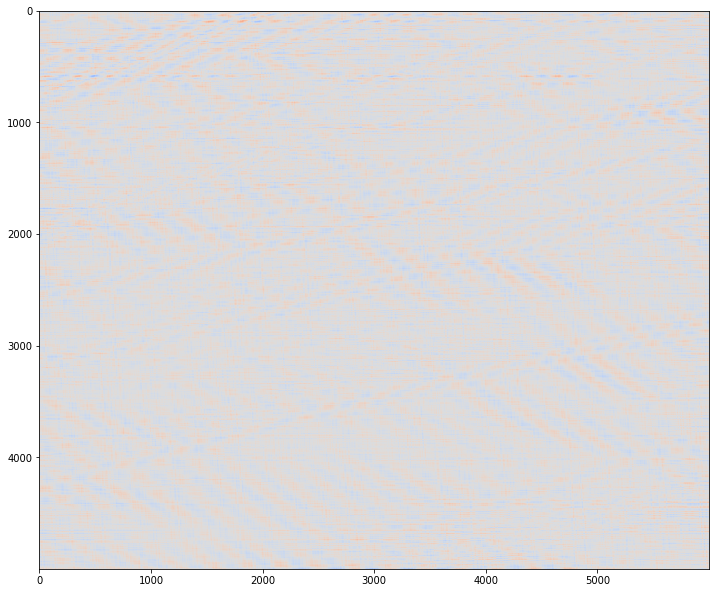

In [68]:
dudt = 0.6369*ux  + 0.3017 * uxxx  -0.0161  *(working_dat**2) * ux  + -0.0070 * (working_dat**2) *uxxx # the GOODIE
# dudt = 0.996 *ux  + 0.091 * uxxx  +0.002   *(working_dat**2) * ux  +0.068 * (working_dat**2) *uxxx 
# dudt = 0.6890 *ux + 0.3257 *uxxx + 0.0029 *working_dat*ux + 0.0083 *working_dat*uxxx
# dudt = 0.7007 *ux + 0.0025 *uxx + 0.3353 *uxxx -0.0077 * (working_dat**2) *uxxx 
# dudt = 0.9954 *ux + 0.0843 *uxxx + 0.0017 * (working_dat**2) *ux + 0.0015 * (working_dat) *uxxx + 0.0686 * (working_dat**2) *uxxx
# dudt = 0.7016 *ux + 0.3356 *uxxx -0.0149 *(working_dat**2) * ux -0.0026 *(working_dat**2) * uxxx
# dudt = 0.6369 *ux + 0.3017 *uxxx -0.0179 *(working_dat**2) * ux-0.0070 * (working_dat**2) *uxxx
# dudt = 0.9912*ux +0.2429 *uxx + 0.6284 *uxxx + 0.4204*(working_dat**2) * uxxx
# dudt = 0.9953 *ux -0.0018 *uxx + 0.0815 *uxxx + 0.0019 * (working_dat**2) *ux  -0.0015 * (working_dat) *uxxx + 0.0672 * (working_dat**2) *uxxx
# dudt = 0.6343  *ux  + 0.3503  *uxxx  + 0.0185 * (working_dat) *ux + 0.0030 * (working_dat**2) *ux

print("Percent diff.: "+str(np.mean(np.abs(dudt-ut))/np.mean(np.abs(ut))))
plt.figure(figsize=(12,12))
plt.imshow(dudt-ut,vmin=-0.1,vmax=0.1,cmap="coolwarm")
plt.show()

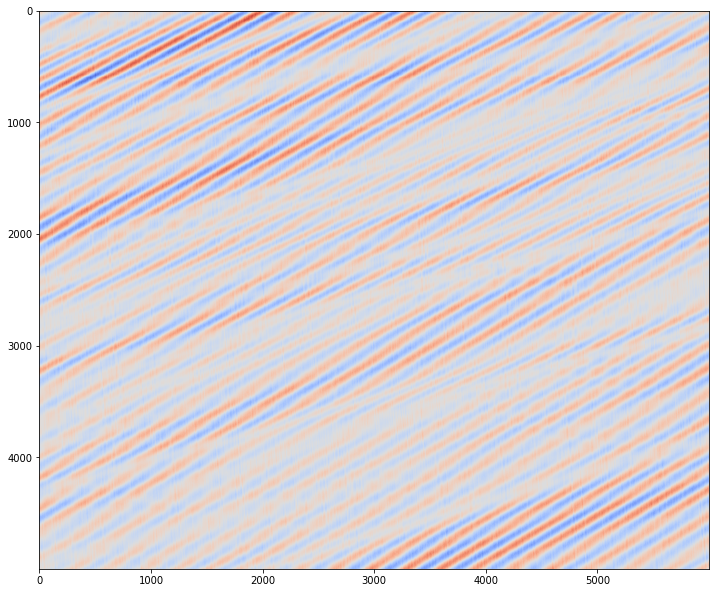

In [38]:
plt.figure(figsize=(12,12))
plt.imshow(ut,vmin=-0.1,vmax=0.1,cmap="coolwarm")
plt.show()

In [13]:
np.save("custom_deriv_discrepency_2.npy",ut-dudt)

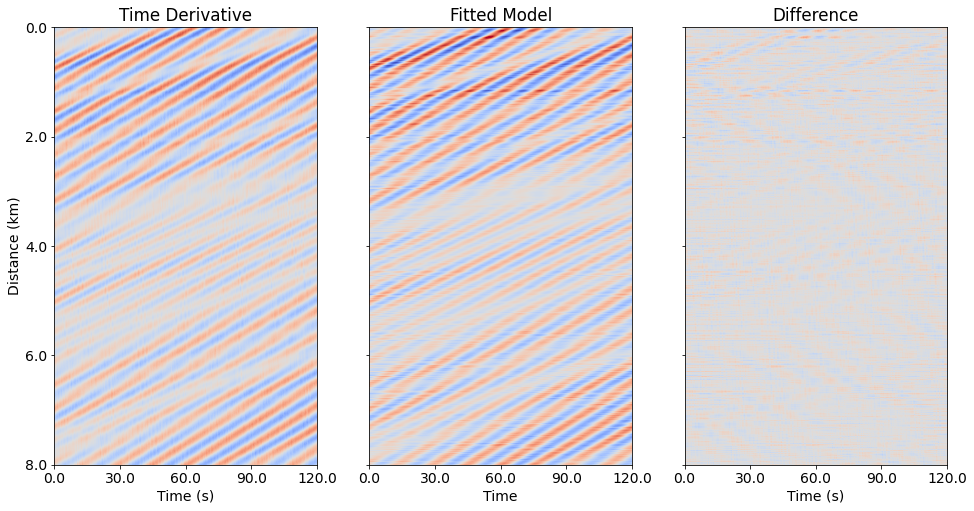

In [27]:
# data2 = ((2*np.pi)/2**16)*((1550.12 * 1e-9)/(0.78 * 4 * np.pi * n * L))*data[7500:12500,:]*1e6
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(nrows=1, ncols=3,figsize = (16, 12),sharey=True)
ax[0].imshow(ut[:4000,:2400],vmin=-0.08,vmax=0.08,cmap="coolwarm")
ax[1].imshow(dudt[:4000,:2400],vmin=-0.08,vmax=0.08, cmap="coolwarm")
ax[2].imshow((dudt-ut)[:4000,:2400],vmin=-0.08,vmax=0.08, cmap="coolwarm")

ax[0].set_yticks(np.linspace(0, 4000, 5),
            (2/1000)*np.linspace(0, 4000, 5))
ax[0].set_xticks(np.linspace(0,2400,5),(10/200)*np.linspace(0,2400,5))
ax[0].set_title('Time Derivative')
ax[0].set_xlabel("Time (s)",size=14)
ax[0].set_ylabel("Distance (km)",size=14)
ax[1].set_xticks(np.linspace(0,2400,5),(10/200)*np.linspace(0,2400,5))
ax[1].set_title('Fitted Model')
ax[1].set_xlabel("Time",size=14)
ax[2].set_title('Difference')
ax[2].set_xlabel("Time (s)",size=14)
ax[2].set_xticks(np.linspace(0,2400,5),(10/200)*np.linspace(0,2400,5))

plt.show()

In [133]:
np.mean(np.abs(ux-uxxx))

0.025895398320470584

In [23]:
np.mean(np.abs(dudt-ut))/np.mean(np.abs(ut))

0.4105221539949081

In [22]:
np.amax(np.abs(dudt-ut))

0.07958674869258031

In [132]:
np.amax(np.abs(ut))

0.07754741948528665

In [12]:
np.mean(np.abs(dudt-ut))/np.mean(np.abs(ut))

0.805771353942145

In [6]:
# working_dat = np.load("/home/ldoyle/notebooks/channel_drift_5_min_clips/normalized_5_min_start_South-C1-LR-95km-P1kHz-GL50m-SP2m-FS200Hz_2021-11-01T231114Z.npy")[:,::10]
working_dat = np.load("/home/ldoyle/notebooks/channel_drift_5_min_clips/rad_4_smoothed_decimated_normalized_5_min_start_South-C1-LR-95km-P1kHz-GL50m-SP2m-FS200Hz_2021-11-01T231114Z.npy")
# working_dat = np.load("/home/ldoyle/notebooks/channel_drift_5_min_clips/rad_10_smoothed_decimated_normalized_5_min_start_South-C1-LR-95km-P1kHz-GL50m-SP2m-FS200Hz_2021-11-01T231114Z.npy")

scaler_val = np.std(working_dat)
working_dat = working_dat/scaler_val
# working_dat = working_dat.reshape(working_dat.shape[0],working_dat.shape[1],1)

In [7]:
dt=1.
dx=1.

In [12]:
# differ = ps.differentiation.SmoothedFiniteDifference()
windw=30
ut = ps.differentiation.SmoothedFiniteDifference(d=1, axis=1,order=4,is_uniform=True,
                         drop_endpoints=False, smoother_kws={'window_length': windw})._differentiate(working_dat, dt)
ux = ps.differentiation.SmoothedFiniteDifference(d=1, axis=0,order=4,is_uniform=True,
                         drop_endpoints=False,smoother_kws={'window_length': windw})._differentiate(working_dat, dx)
uxx = ps.differentiation.SmoothedFiniteDifference(d=2, axis=0,order=4,is_uniform=True,
                          drop_endpoints=False,smoother_kws={'window_length': windw})._differentiate(working_dat, dx)
uxxx = ps.differentiation.SmoothedFiniteDifference(d=3, axis=0,order=4,is_uniform=True,
                           drop_endpoints=False,smoother_kws={'window_length': windw})._differentiate(working_dat, dx)
uxxxx = ps.differentiation.SmoothedFiniteDifference(d=4, axis=0,
                            drop_endpoints=False,smoother_kws={'window_length': windw})._differentiate(working_dat, dx)

In [15]:
# dudt = 0.4602 *ux + 0.2175 *uxxx  -0.0121 * (working_dat**2)*ux
# dudt = 0.4697 *ux + 0.2397 *uxxx -0.0286  * (working_dat**2)*ux -0.0142 * (working_dat**2)*uxxx
# dudt = 0.4612 *ux   -0.0114 *uxx  + 0.2196 *uxxx   -0.0102 * (working_dat**2)*ux  -0.0076 * (working_dat**2)*uxxx
# dudt = 0.9943 *ux + 0.2847 *uxx + 1.1782 *uxxx + 0.3908 * (working_dat**2)*uxxx
# dudt = 0.462621 *ux + 0.219839 *uxxx  -0.016251 * (working_dat**2)*ux  -0.006817* (working_dat**2)*uxxx
dudt = 0.6369*ux  + 0.3017 * uxxx  -0.0161  *(working_dat**2) * ux  + -0.0070 * (working_dat**2) *uxxx # the GOODIE
# dudt = 0.625791 *ux + 0.292093 *uxxx  -0.001524*(working_dat**2) * ux 
# dudt = 0.9932 *ux + 0.2852 *uxx + 1.1621 *uxxx + 0.4053* (working_dat**2) *uxxx

# dudt = 0.5766 *ux + 0.7628 *uxxx + 0.6111 *(working_dat**2) * uxxx

Percent diff.: 0.24644900799262154


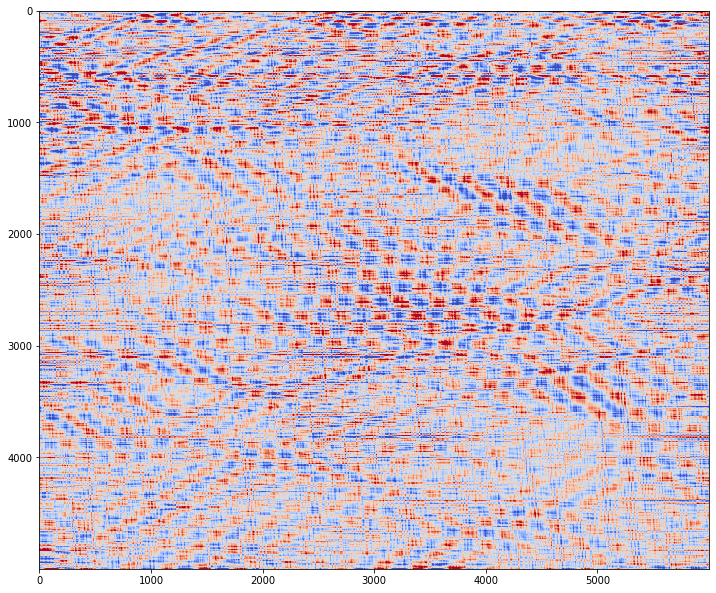

In [11]:
print("Percent diff.: "+str(np.mean(np.abs(dudt-ut))/np.mean(np.abs(ut))))
plt.figure(figsize=(12,12))
plt.imshow(dudt-ut,vmin=-0.01,vmax=0.01,cmap="coolwarm")
plt.show()

Percent diff.: 0.22779975086688972


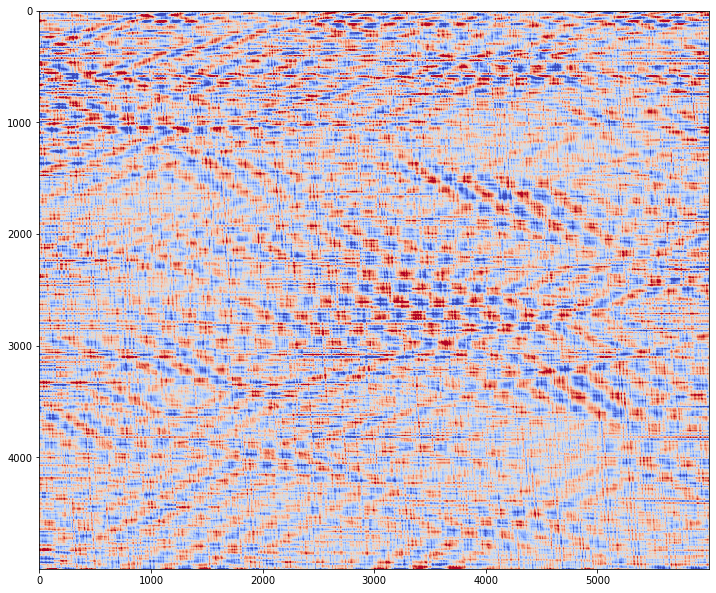

In [14]:
print("Percent diff.: "+str(np.mean(np.abs(dudt-ut))/np.mean(np.abs(ut))))
plt.figure(figsize=(12,12))
plt.imshow(dudt-ut,vmin=-0.01,vmax=0.01,cmap="coolwarm")
plt.show()

Percent diff.: 0.23498353620947512


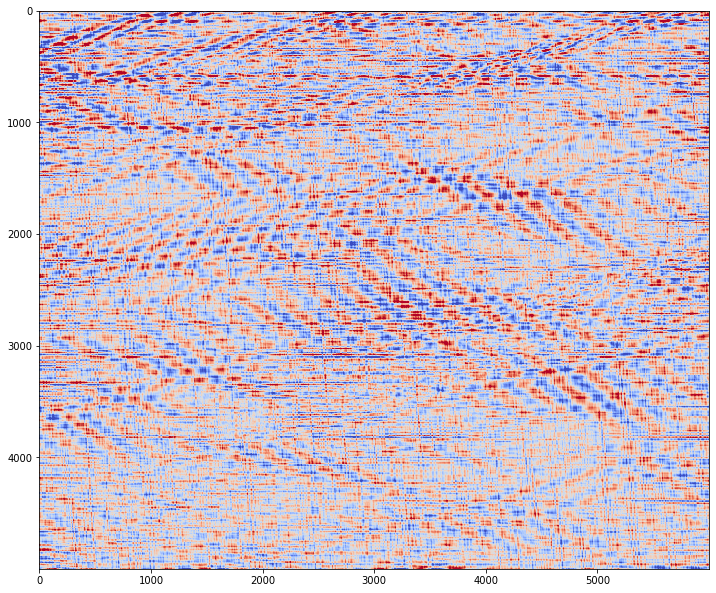

In [16]:
print("Percent diff.: "+str(np.mean(np.abs(dudt-ut))/np.mean(np.abs(ut))))
plt.figure(figsize=(12,12))
plt.imshow(dudt-ut,vmin=-0.01,vmax=0.01,cmap="coolwarm")
plt.show()